In [62]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model


In [63]:
from subprocess import check_output

In [64]:
data = pd.read_csv(r'C:\Users\asus\Desktop/rainfall in india.csv')

In [65]:
data.head(1000)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BIHAR,1999,0.1,0.2,0.4,3.8,83.6,265.1,380.8,347.5,199.6,114.1,6.9,0.6,1402.7,0.3,87.8,1192.9,121.7
996,BIHAR,2000,0.5,12.1,3.6,37.2,96.2,267.2,264.3,201.4,314.8,9.6,0.0,0.1,1207.0,12.7,137.0,1047.7,9.7
997,BIHAR,2001,1.0,0.5,3.0,12.6,98.4,224.4,224.7,225.9,274.8,181.3,0.5,0.0,1247.0,1.5,114.0,949.8,181.8
998,BIHAR,2002,13.4,11.3,2.2,25.0,74.8,116.6,386.1,247.7,192.8,33.8,1.4,0.7,1105.8,24.6,102.1,943.2,35.8


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [67]:
data.dropna(how='any', inplace=True)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4090 non-null   object 
 1   YEAR         4090 non-null   int64  
 2   JAN          4090 non-null   float64
 3   FEB          4090 non-null   float64
 4   MAR          4090 non-null   float64
 5   APR          4090 non-null   float64
 6   MAY          4090 non-null   float64
 7   JUN          4090 non-null   float64
 8   JUL          4090 non-null   float64
 9   AUG          4090 non-null   float64
 10  SEP          4090 non-null   float64
 11  OCT          4090 non-null   float64
 12  NOV          4090 non-null   float64
 13  DEC          4090 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4090 non-null   float64
 16  Mar-May      4090 non-null   float64
 17  Jun-Sep      4090 non-null   float64
 18  Oct-Dec      4090 non-null   float64
dtypes: flo

In [69]:
subdivs = data['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
subdivs

Total # of Subdivs: 36


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [70]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
mean,1958.321271,18.818484,21.644792,27.252494,42.714548,84.868044,228.928020,346.496968,289.897506,197.003056,95.139022,39.548191,18.695575,1411.008900,40.462861,154.835452,1062.325575,153.384499
std,33.148944,33.521719,35.762010,46.829179,67.264863,122.556801,233.535693,269.352685,187.702293,135.266708,99.325638,68.275513,42.185553,903.846565,59.136229,200.315769,705.970202,166.414108
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.500000,70.000000,175.225000,155.925000,100.400000,14.600000,0.700000,0.100000,804.500000,4.100000,23.800000,573.275000,34.025000
50%,1959.000000,5.900000,6.600000,7.800000,15.500000,36.050000,138.450000,284.300000,259.500000,173.600000,64.650000,9.500000,3.000000,1121.300000,19.000000,74.250000,880.200000,97.550000
75%,1987.000000,21.950000,26.600000,31.100000,49.375000,94.975000,302.250000,416.700000,377.775000,265.600000,148.100000,45.475000,17.300000,1644.775000,50.200000,195.300000,1286.175000,211.800000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


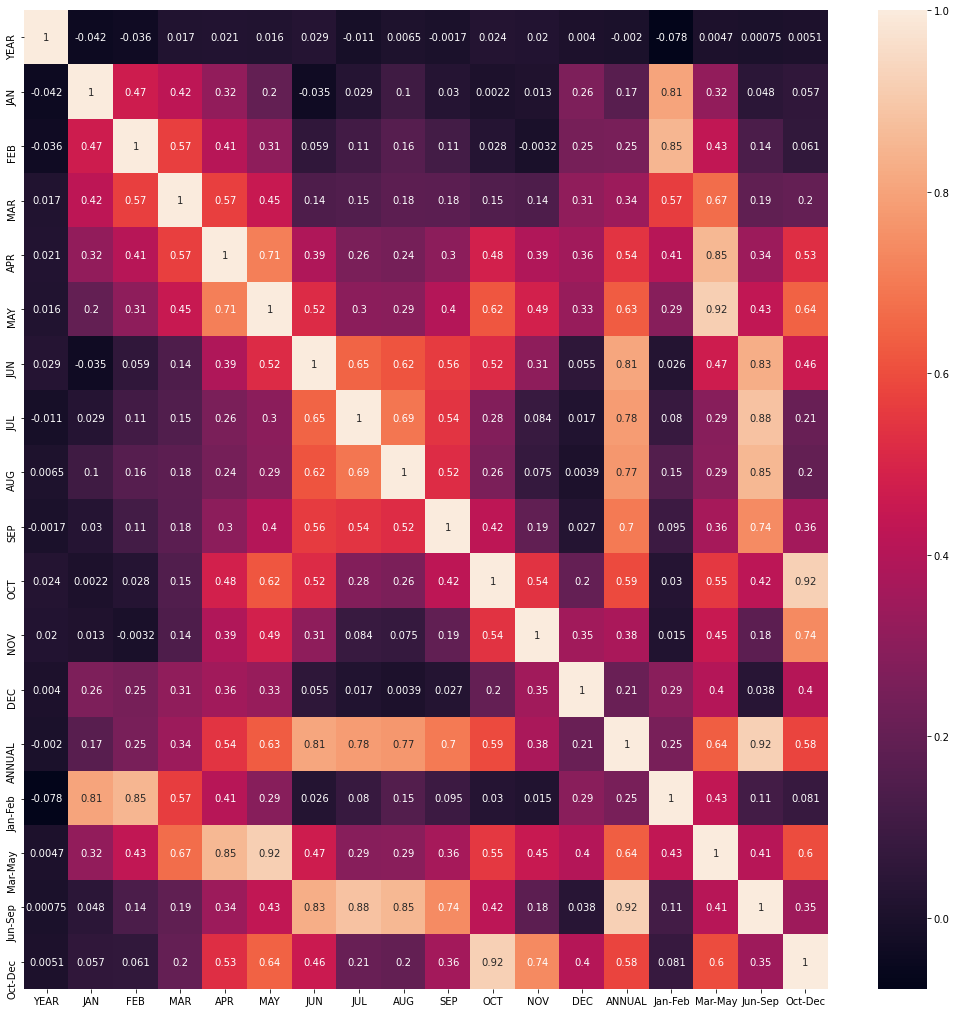

In [71]:
import seaborn as sns
corrmat = data.corr(method = "spearman")
plt.figure(figsize=(18,18))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

SUBDIVISION
ARUNACHAL PRADESH    3418.857143
COASTAL KARNATAKA    3408.409649
KONKAN & GOA         2977.686087
Name: ANNUAL, dtype: float64
SUBDIVISION
HARYANA DELHI & CHANDIGARH    530.496522
SAURASHTRA & KUTCH            495.161739
WEST RAJASTHAN                292.673043
Name: ANNUAL, dtype: float64


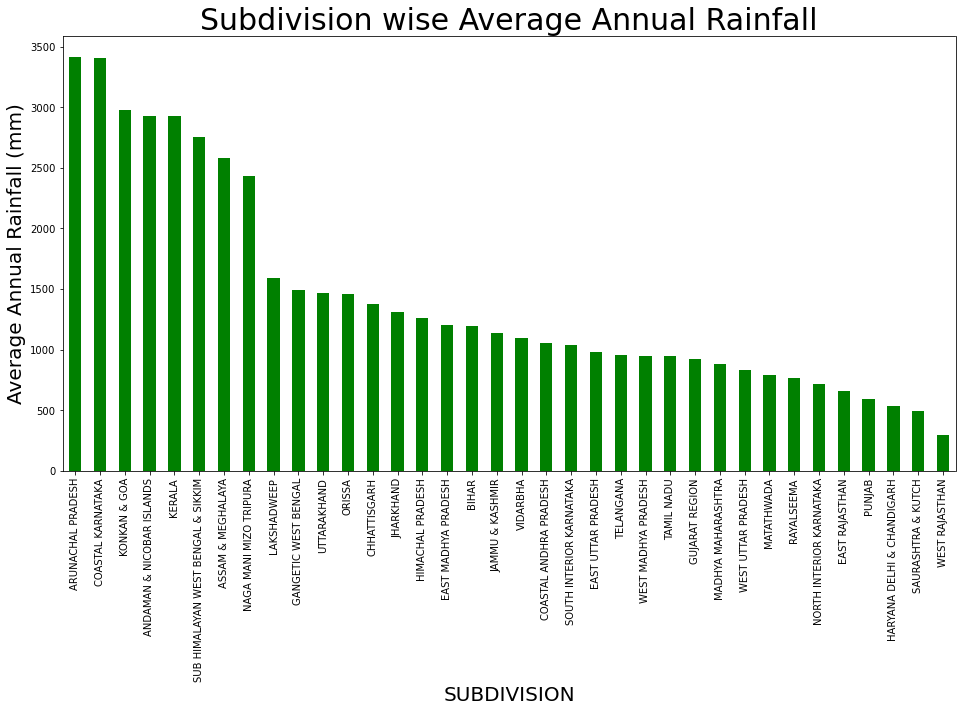

In [72]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
data.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot(kind='bar', color='g',width=0.5,title='Subdivision wise Average Annual Rainfall', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(data.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[0,1,2]])
print(data.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[33,34,35]])

Max: 61815.600000000006 ocurred in [1961]
Max: 41273.6 ocurred in [1972]
Mean: 50182.83826086957


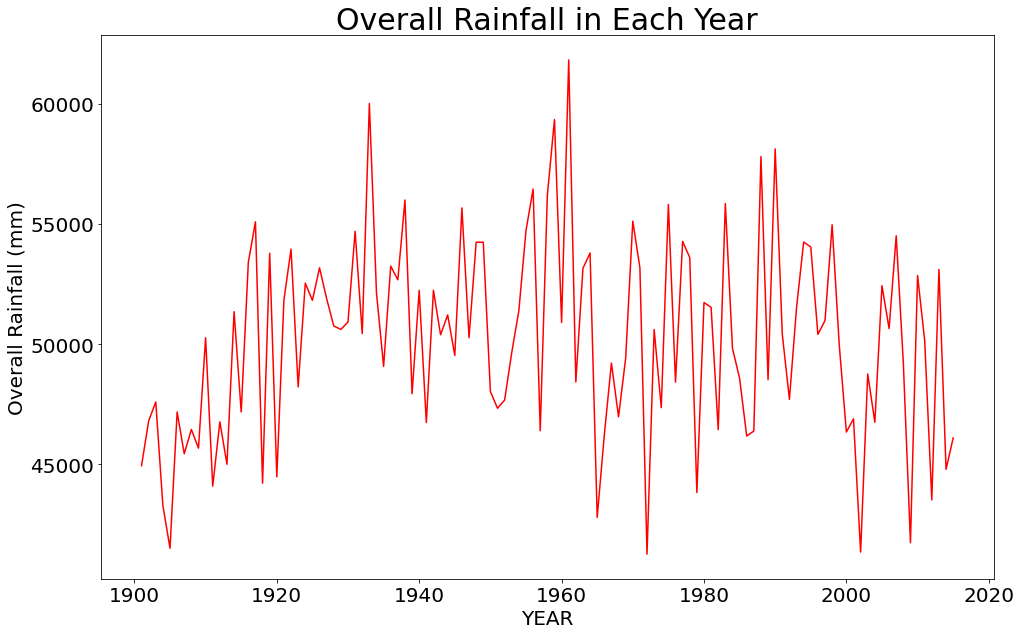

In [73]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = data.groupby('YEAR').sum()['ANNUAL']
dfg.plot(kind='line',color='r', title='Overall Rainfall in Each Year', fontsize=20)
#df.groupby('YEAR').sum()['ANNUAL'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

Max: 348.56750468137267 ocurred in ['JUL']
Max: 19.11137059083043 ocurred in ['JAN']
Mean: 118.95843815772808


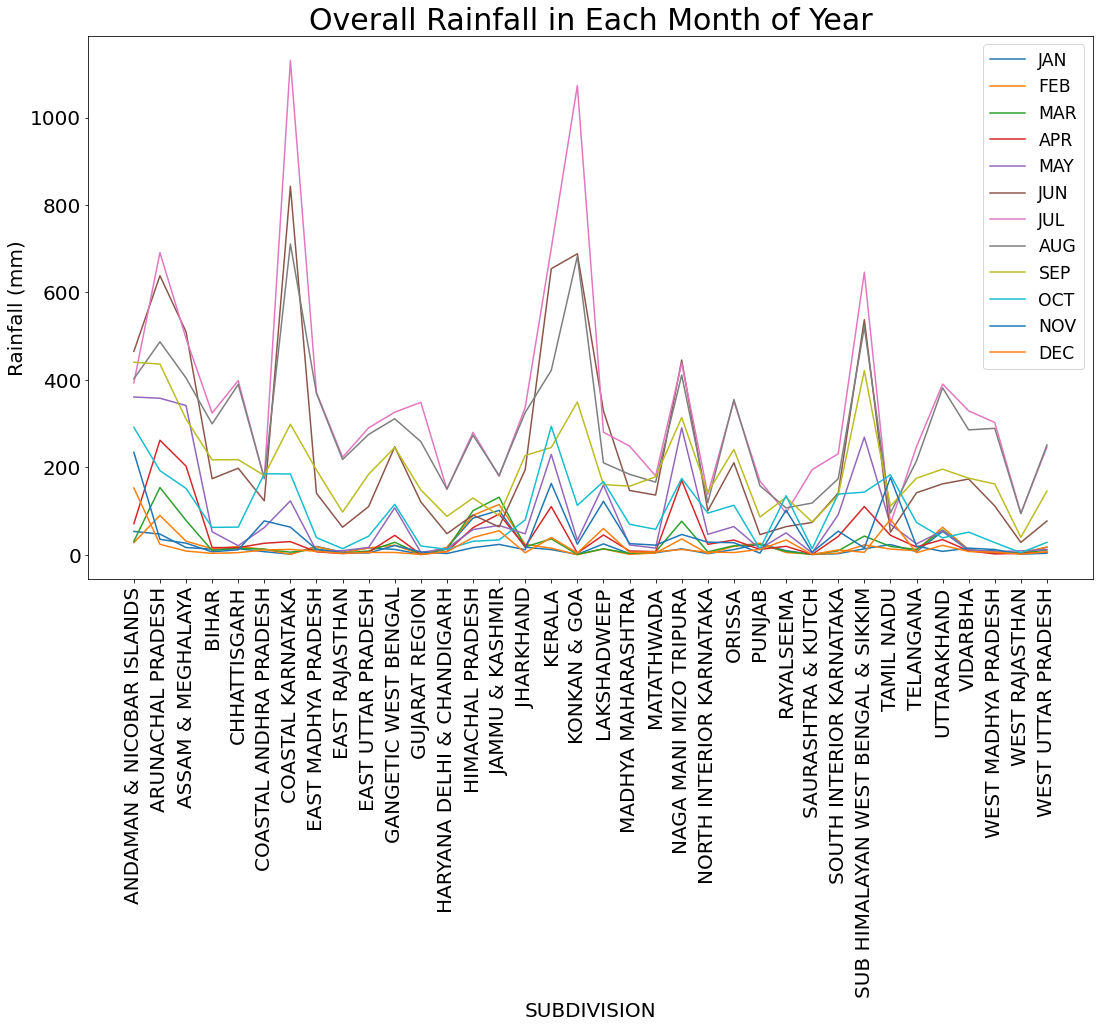

In [74]:
months = data.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = data['SUBDIVISION'].unique()
xlbls.sort()
dfg = data.groupby('SUBDIVISION').mean()[months]
dfg.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

dfg = dfg.mean(axis=0)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

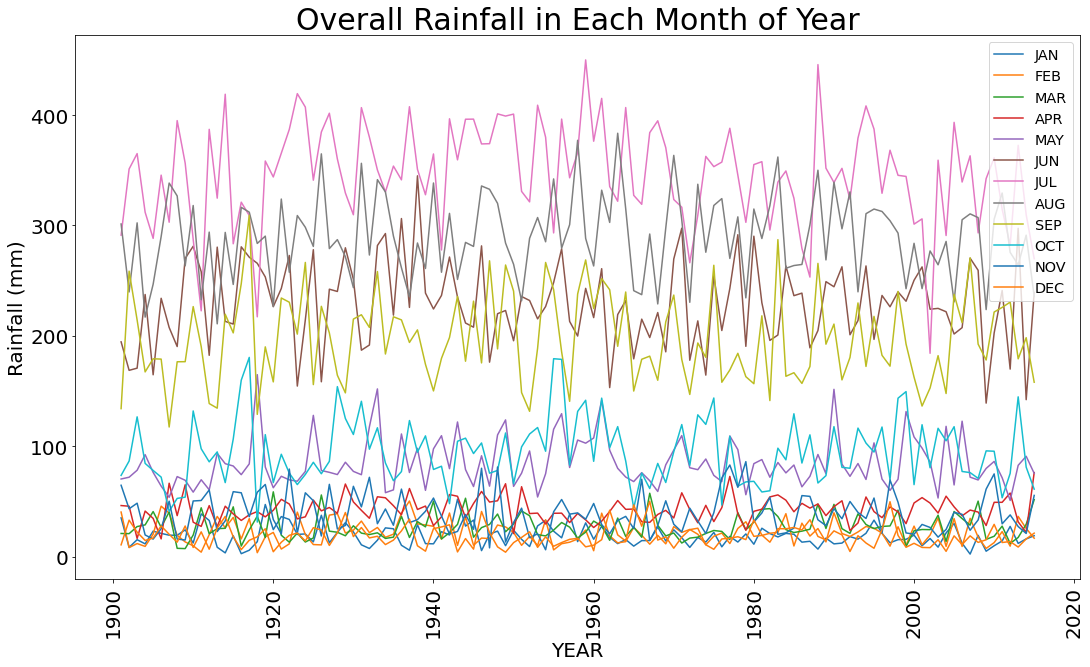

In [75]:
months = data.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
data.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
#plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'JAN'}>,
        <AxesSubplot:title={'center':'FEB'}>,
        <AxesSubplot:title={'center':'MAR'}>],
       [<AxesSubplot:title={'center':'APR'}>,
        <AxesSubplot:title={'center':'MAY'}>,
        <AxesSubplot:title={'center':'JUN'}>,
        <AxesSubplot:title={'center':'JUL'}>],
       [<AxesSubplot:title={'center':'AUG'}>,
        <AxesSubplot:title={'center':'SEP'}>,
        <AxesSubplot:title={'center':'OCT'}>,
        <AxesSubplot:title={'center':'NOV'}>],
       [<AxesSubplot:title={'center':'DEC'}>,
        <AxesSubplot:title={'center':'ANNUAL'}>,
        <AxesSubplot:title={'center':'Jan-Feb'}>,
        <AxesSubplot:title={'center':'Mar-May'}>],
       [<AxesSubplot:title={'center':'Jun-Sep'}>,
        <AxesSubplot:title={'center':'Oct-Dec'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

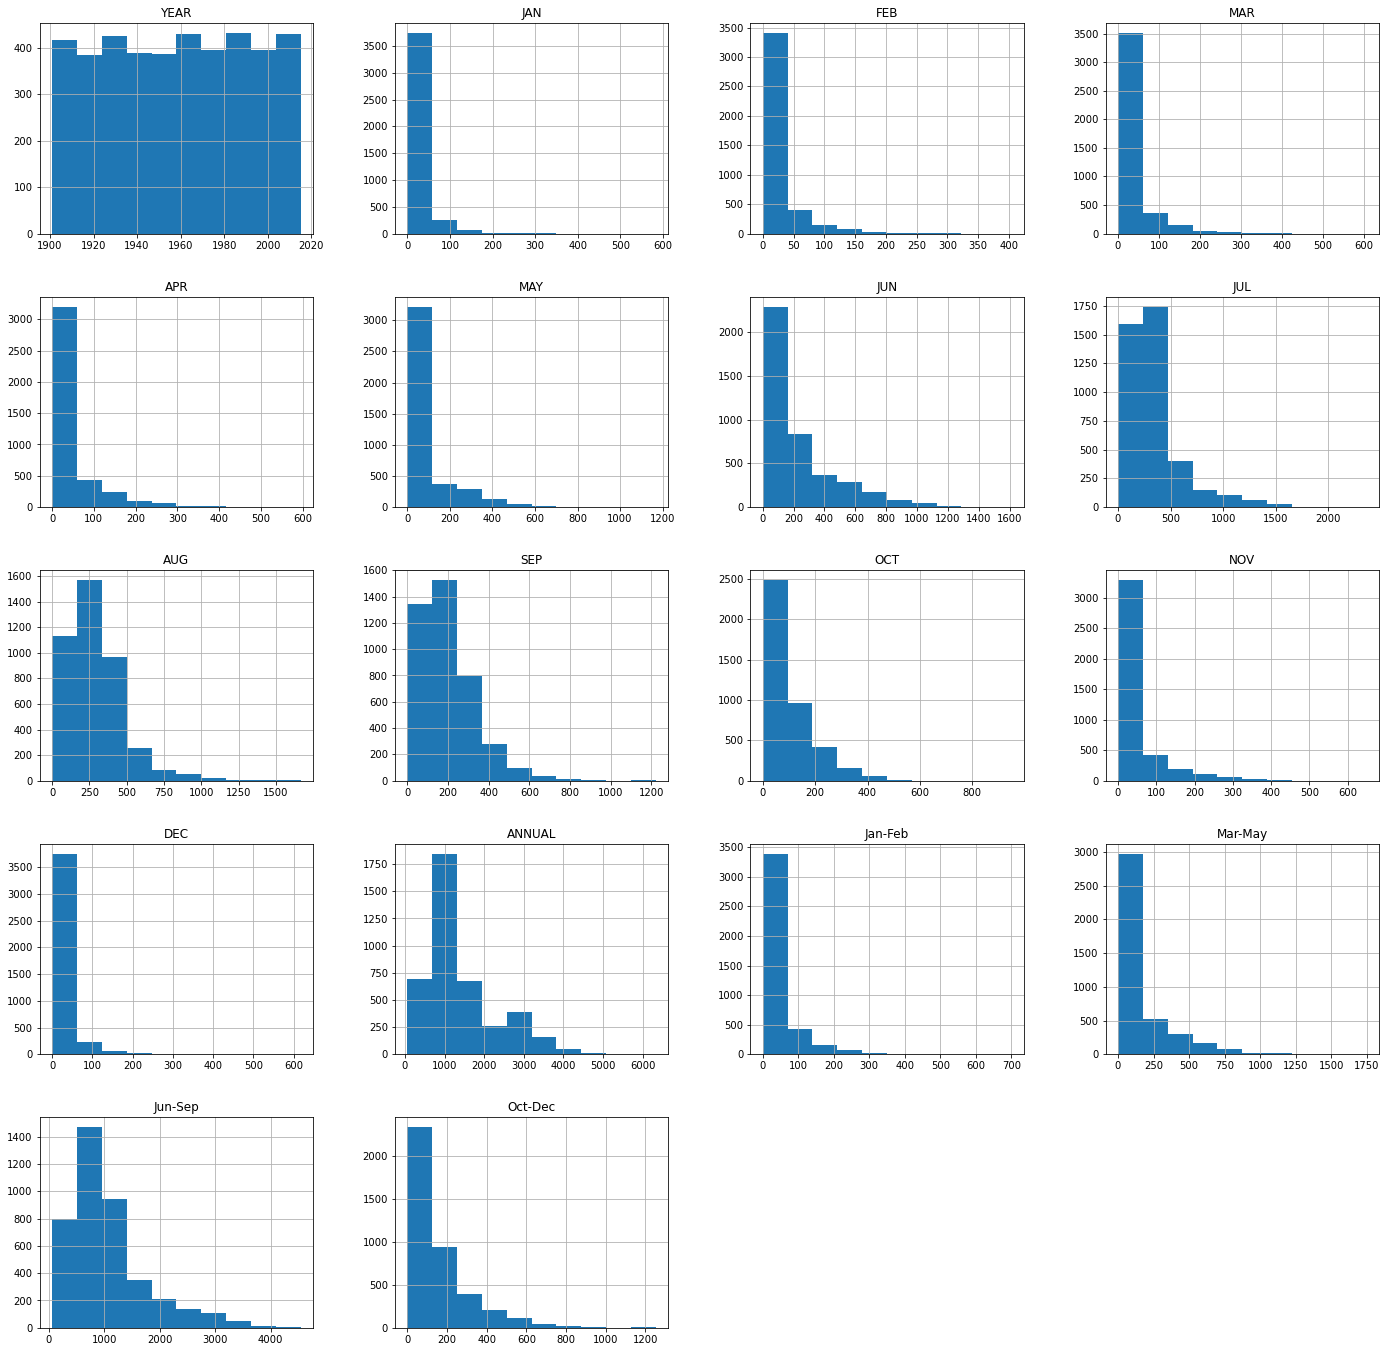

In [76]:
data.hist(figsize=(24,24))

In [77]:
from sklearn.model_selection import train_test_split
y = data['YEAR']
X = data.drop('YEAR', axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [79]:
X


,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [80]:
y


0       1901
1       1902
2       1903
3       1904
4       1905
        ... 
4111    2011
4112    2012
4113    2013
4114    2014
4115    2015
Name: YEAR, Length: 4090, dtype: int64

In [81]:
X_train

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
414,NAGA MANI MIZO TRIPURA,11.1,139.3,92.8,155.4,499.4,539.6,530.9,428.9,302.9,165.4,16.0,0.0,2881.7,150.4,747.7,1802.3,181.4
1585,PUNJAB,21.8,20.1,30.3,24.5,20.8,20.6,76.3,41.9,105.8,6.0,0.7,14.1,382.7,41.9,75.5,244.6,20.7
3171,COASTAL ANDHRA PRADESH,10.3,81.1,84.5,24.2,507.7,107.4,102.5,223.2,158.5,248.7,58.9,4.3,1611.1,91.4,616.4,591.5,311.9
3212,TELANGANA,0.0,4.1,0.0,15.9,16.1,233.2,216.4,137.0,291.8,153.1,95.1,0.0,1162.6,4.1,32.0,878.4,248.1
1637,HIMACHAL PRADESH,112.3,69.4,87.4,90.4,89.1,38.8,217.3,309.3,124.5,19.3,69.6,11.1,1238.5,181.7,266.8,690.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ANDAMAN & NICOBAR ISLANDS,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9,104.7,878.7,1515.4,582.0
1946,EAST RAJASTHAN,19.0,30.2,33.2,2.3,5.0,33.7,70.0,108.8,29.5,69.1,0.0,0.8,401.8,49.2,40.6,242.0,69.9
924,BIHAR,41.2,21.5,0.1,18.3,54.3,208.0,377.2,272.9,83.3,164.3,0.9,7.6,1249.8,62.7,72.7,941.5,172.8
3263,TELANGANA,0.3,0.0,62.7,8.5,1.1,166.7,320.8,183.7,139.4,5.6,0.2,53.1,942.1,0.3,72.3,810.6,58.8


In [82]:
y_train

414     1993
1585    2014
3171    1990
3212    1916
1637    1951
        ... 
95      2001
1946    1915
924     1928
3263    1967
602     1951
Name: YEAR, Length: 3272, dtype: int64

In [83]:
X_test

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
1206,WEST UTTAR PRADESH,4.5,4.8,19.3,0.4,2.2,104.7,349.4,364.4,99.3,16.1,1.4,18.1,984.7,9.2,21.9,917.9,35.6
1562,PUNJAB,0.1,39.8,16.0,34.8,10.8,73.5,86.8,144.3,41.7,1.0,0.2,26.8,475.9,39.9,61.7,346.3,28.0
2230,EAST MADHYA PRADESH,8.3,2.7,1.1,0.7,9.7,41.7,553.4,392.8,198.3,0.0,33.2,0.0,1242.1,11.1,11.6,1186.3,33.2
2119,WEST MADHYA PRADESH,0.1,5.2,0.0,0.3,2.6,74.0,553.1,478.8,256.6,26.2,0.2,9.8,1406.9,5.3,2.9,1362.5,36.2
204,ARUNACHAL PRADESH,18.5,40.5,115.1,175.1,335.8,290.0,329.6,230.2,316.1,164.1,13.3,14.6,2042.9,59.0,626.0,1165.9,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,CHHATTISGARH,48.9,116.5,27.8,5.5,18.4,101.6,381.0,476.7,182.8,27.3,0.4,0.0,1387.0,165.4,51.7,1142.2,27.7
3736,NORTH INTERIOR KARNATAKA,0.1,0.0,1.6,51.5,20.1,149.1,126.0,171.6,125.9,19.8,22.6,3.4,691.7,0.1,73.2,572.5,45.9
340,NAGA MANI MIZO TRIPURA,17.5,18.1,17.3,151.1,132.7,358.4,403.5,372.9,375.0,111.1,84.8,5.7,2047.9,35.6,301.0,1509.7,201.6
940,BIHAR,27.3,32.6,42.0,34.1,21.9,223.9,253.5,322.8,221.3,48.5,0.2,0.8,1228.8,59.9,98.0,1021.5,49.5


In [84]:
y_test

1206    1980
1562    1991
2230    1969
2119    1973
204     2013
        ... 
2967    1901
3736    1980
340     1919
940     1944
3996    2010
Name: YEAR, Length: 818, dtype: int64

MAD (Training Data): 93.84136415670035
MAD (Test Data): 93.23176646066385


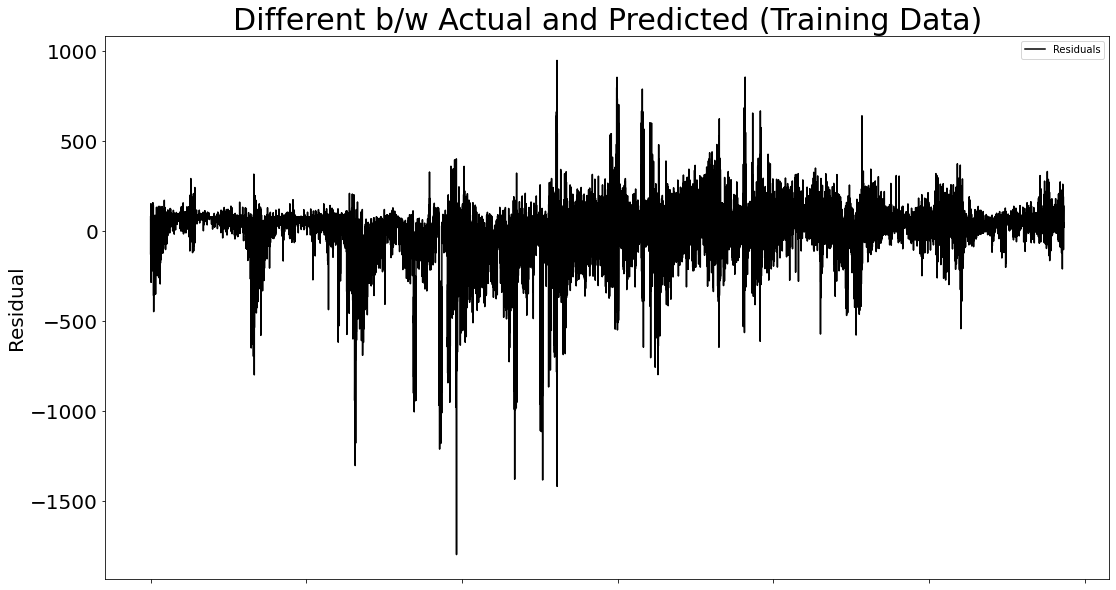

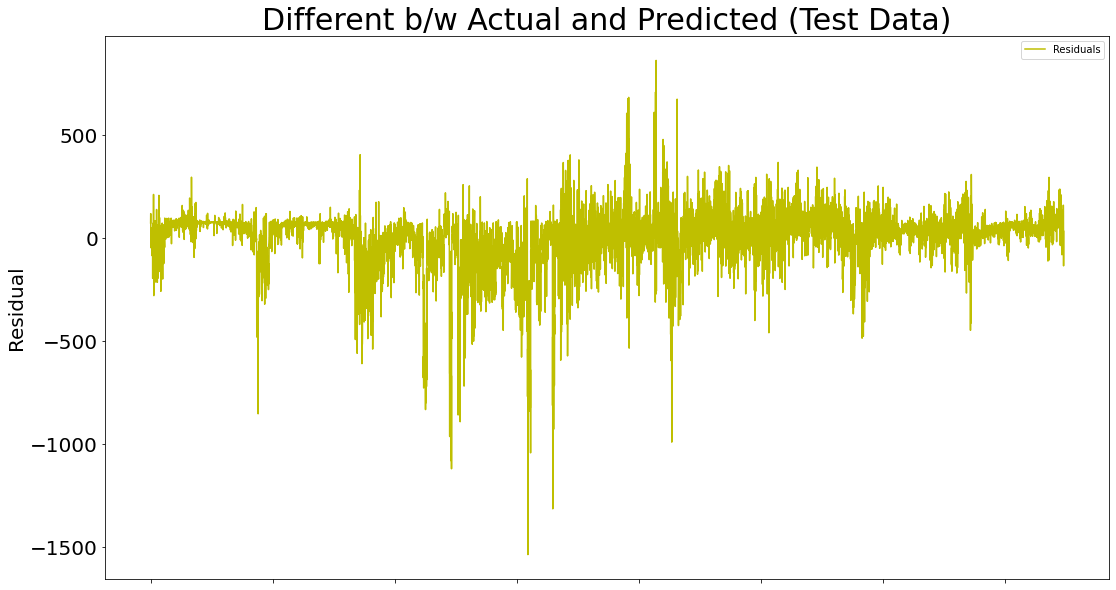

In [85]:
df2 = data[['SUBDIVISION',months[0],months[1],months[2],months[3]]]
#df2 = df['YEAR','JAN','FEB','MAR','APR']
df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = data[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
    
#df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)

df2.drop('SUBDIVISION', axis=1,inplace=True)
#print(df2.info())
msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Training Data)', color = 'k', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Test Data)', color='y', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

MAD (Training Data): 88.36241977253178
MAD (Test Data): 87.54785493393311


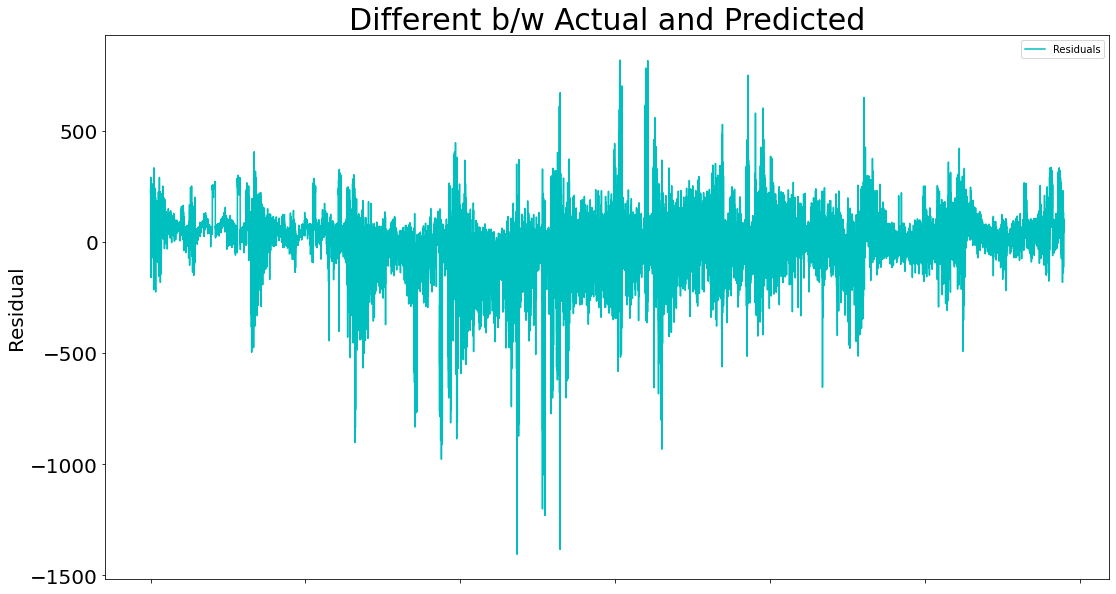

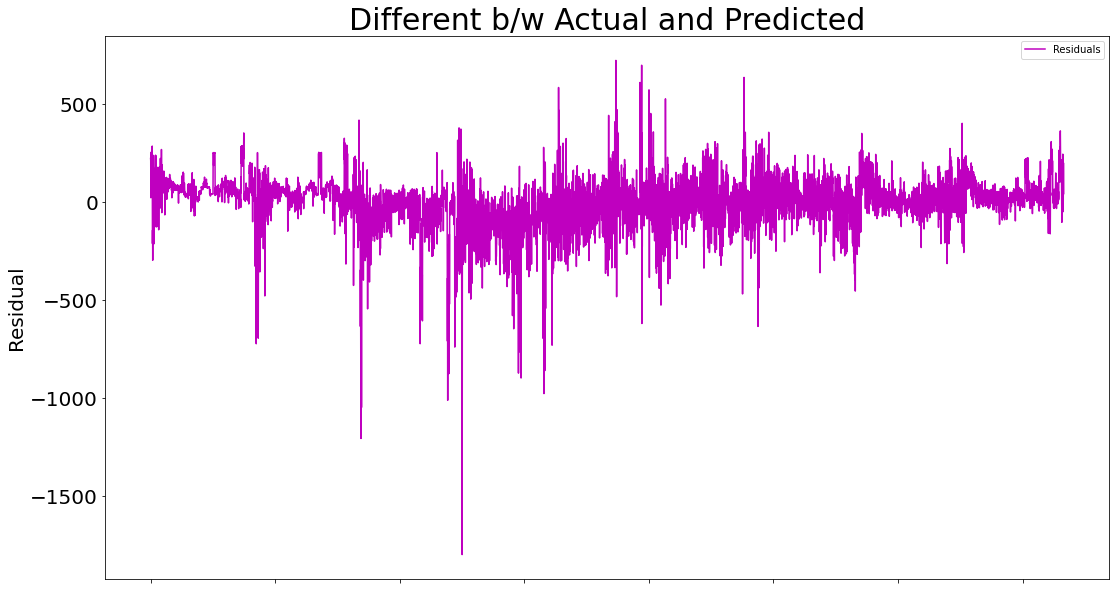

In [86]:
df2 = data[['SUBDIVISION',months[0],months[1],months[2],months[3]]]

df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = data[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)


df2.drop('SUBDIVISION', axis=1,inplace=True)

msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])


reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
#print(reg.coef_)
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted', color = 'c', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)



predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

Overall MAD (Training): 86.35647760120858
Overall MAD (Testing): 86.46937041412927


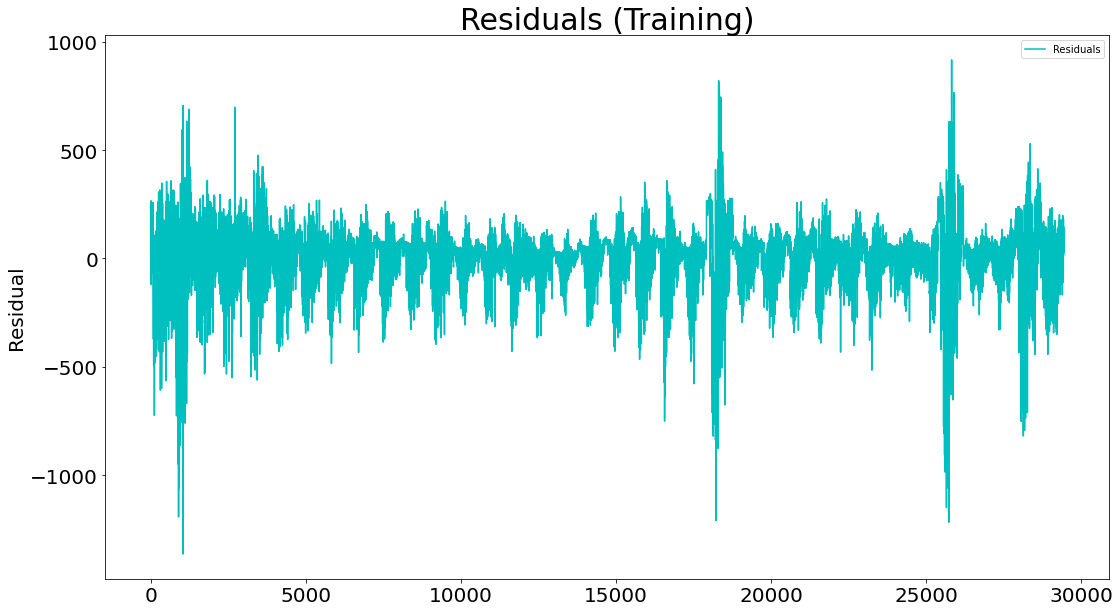

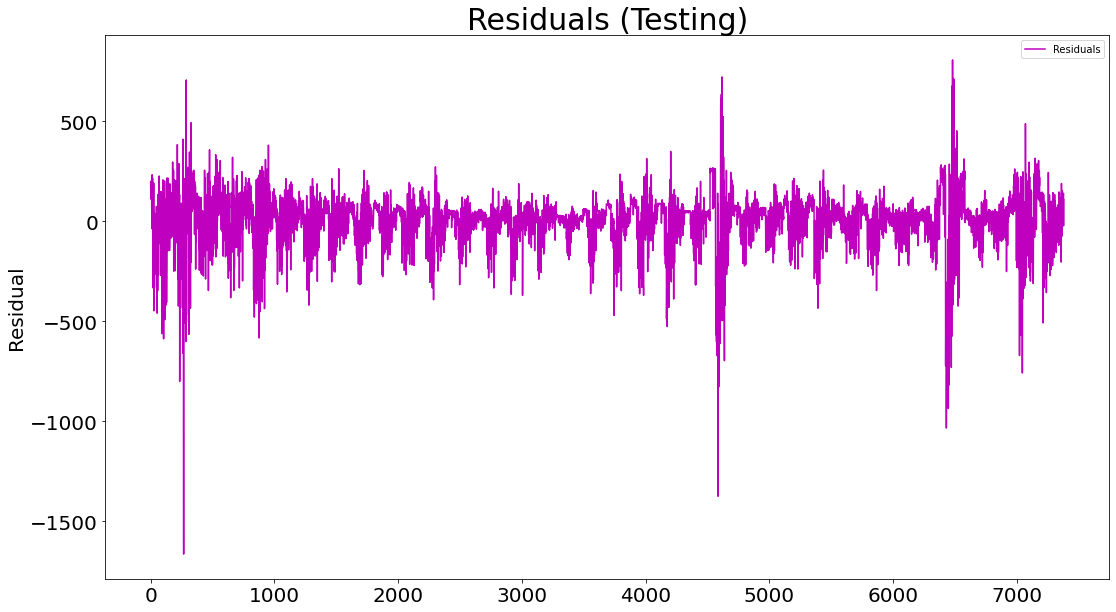

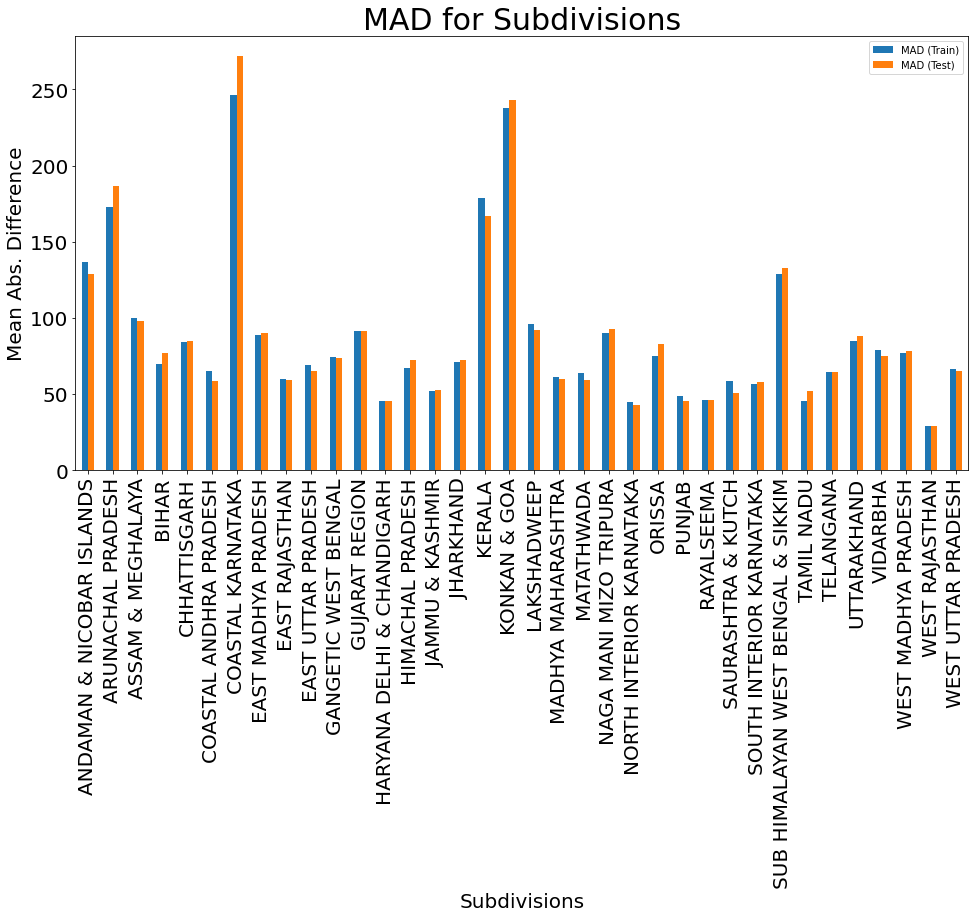

In [87]:
df_res_training = pd.DataFrame(columns=np.array(['Residuals']))
df_res_testing = pd.DataFrame(columns=np.array(['Residuals']))
list_mad_training = []
mean_abs_diff_training = 0
list_mad_testing = []
mean_abs_diff_testing = 0
for subd in subdivs:
    df1 = data[data['SUBDIVISION']==subd]
    df2 = df1[[months[0],months[1],months[2],months[3]]]
    df2.columns = np.array(['x1','x2','x3','x4'])
    for k in range(1,9):
        df3 = df1[[months[k],months[k+1],months[k+2],months[k+3]]]
        df3.columns = np.array(['x1','x2','x3','x4'])
        df2 = df2.append(df3)
    df2.index = range(df2.shape[0])
    msk = np.random.rand(len(df2)) < 0.8
    df_train = df2[msk]
    df_test = df2[~msk]
    df_train.index = range(df_train.shape[0])
    df_test.index = range(df_test.shape[0])
    reg = linear_model.LinearRegression()
    reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
    
    predicted_values = reg.predict(df_train.drop('x4',axis=1))
    residuals = predicted_values-df_train['x4'].values
    df_res_training = df_res_training.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_training = mean_abs_diff_training + np.sum(np.abs(residuals))
    list_mad_training.append(np.mean(np.abs(residuals)))
    
    predicted_values = reg.predict(df_test.drop('x4',axis=1))
    residuals = predicted_values-df_test['x4'].values
    df_res_testing = df_res_testing.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_testing = mean_abs_diff_testing + np.sum(np.abs(residuals))
    list_mad_testing.append(np.mean(np.abs(residuals)))
    
    
df_res_training.index = range(df_res_training.shape[0])
mean_abs_diff_training = mean_abs_diff_training/df_res_training.shape[0]
print('Overall MAD (Training): ' + str(mean_abs_diff_training))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_training.plot.line(title='Residuals (Training)', color='c',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

df_res_testing.index = range(df_res_testing.shape[0])
mean_abs_diff_testing = mean_abs_diff_testing/df_res_testing.shape[0]
print('Overall MAD (Testing): ' + str(mean_abs_diff_testing))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_testing.plot.line(title='Residuals (Testing)', color='m',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


pd_mad = pd.DataFrame(data=list_mad_training,columns=["MAD (Train)"])
pd_mad["MAD (Test)"] = list_mad_testing;
pd_mad['Subdivisions'] = subdivs;
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
#pd_mad.groupby('Subdivisions').mean().plot(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
pd_mad.groupby('Subdivisions').mean().plot.bar( width=0.5,title='MAD for Subdivisions', ax= ax, fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Mean Abs. Difference')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [89]:
#test 2010
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)
#test 2005

In [90]:
#test 2015
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)

In [91]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

95.0542239473868
